<IPython.core.display.Javascript object>


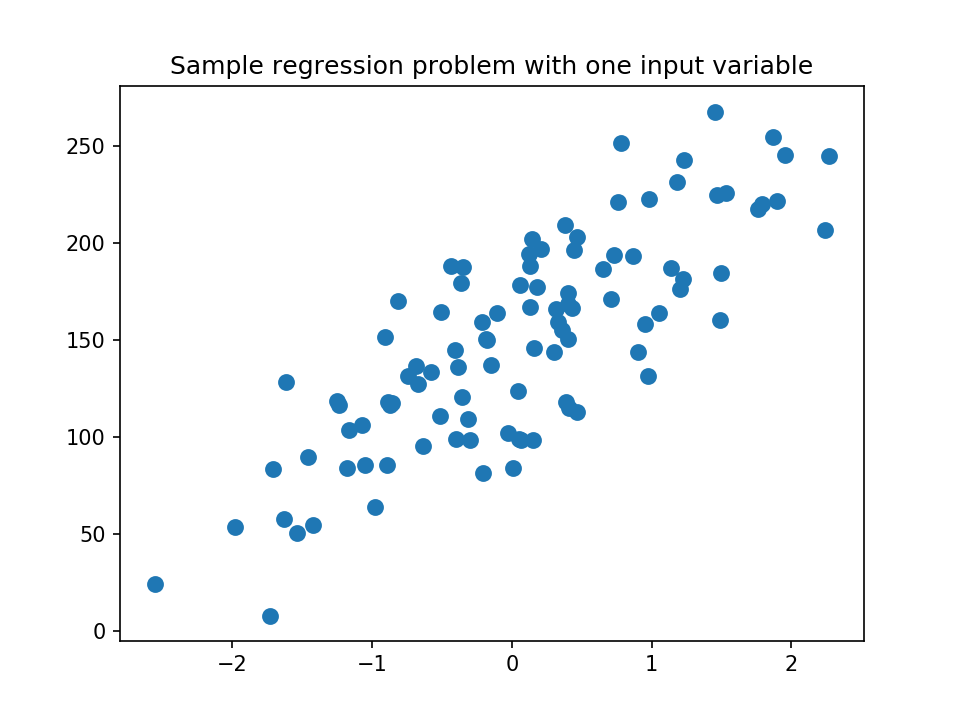

In [4]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, make_classification, make_blobs
from matplotlib.colors import ListedColormap
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# Load Fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
columns = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[columns]
y_fruits = fruits['fruit_label']

# Synthetic dataset for complex regression

from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


<IPython.core.display.Javascript object>


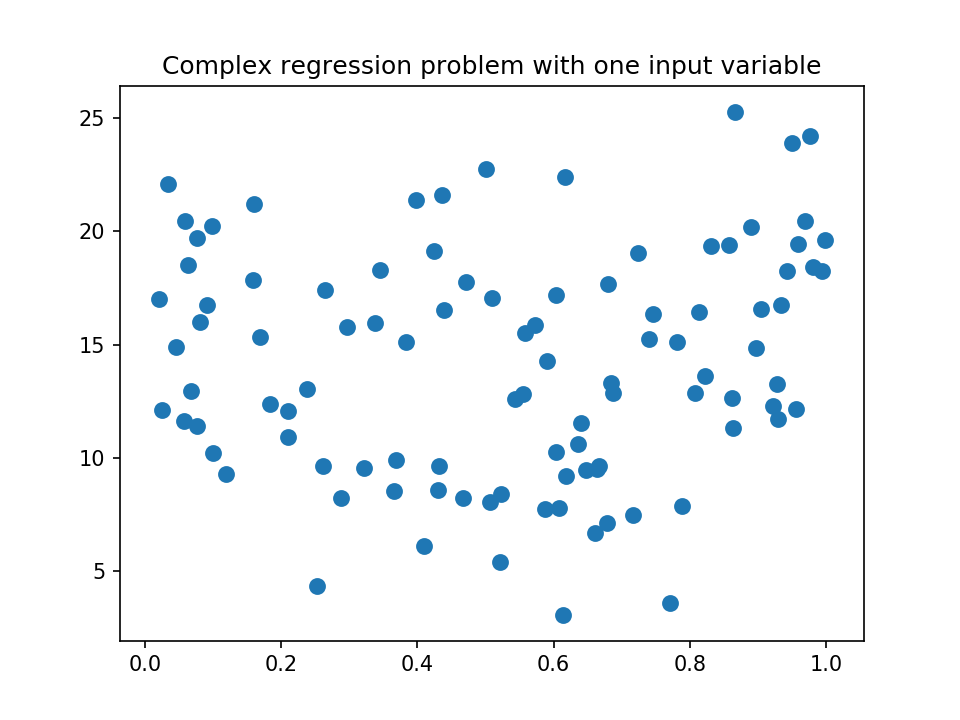

In [5]:
# synthetic dataset for more complex regression using FriedMan regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()


<IPython.core.display.Javascript object>


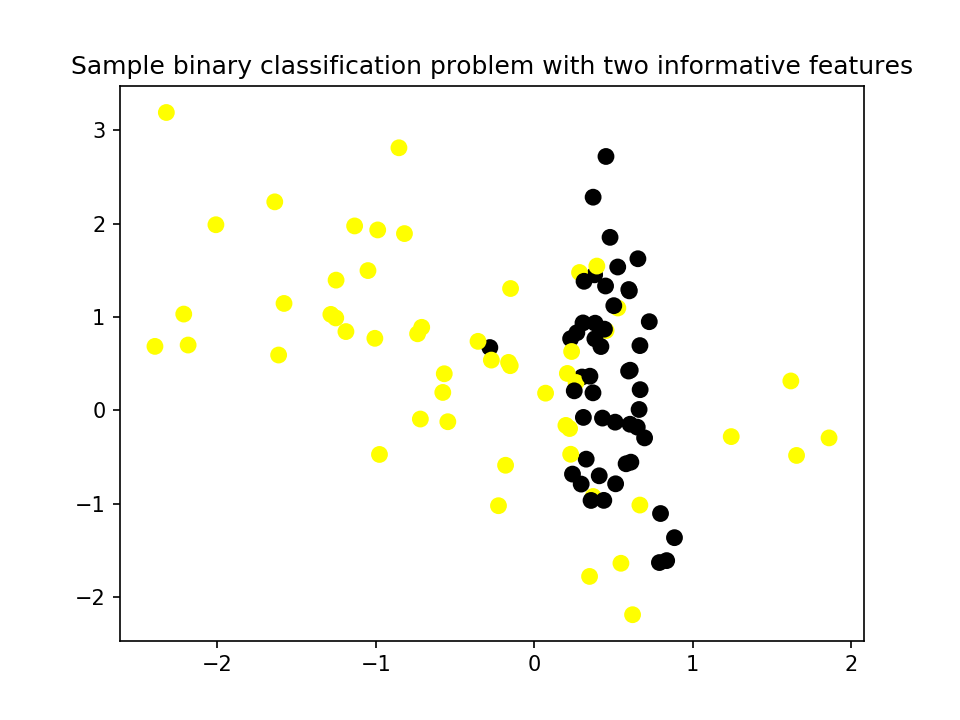

In [7]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>


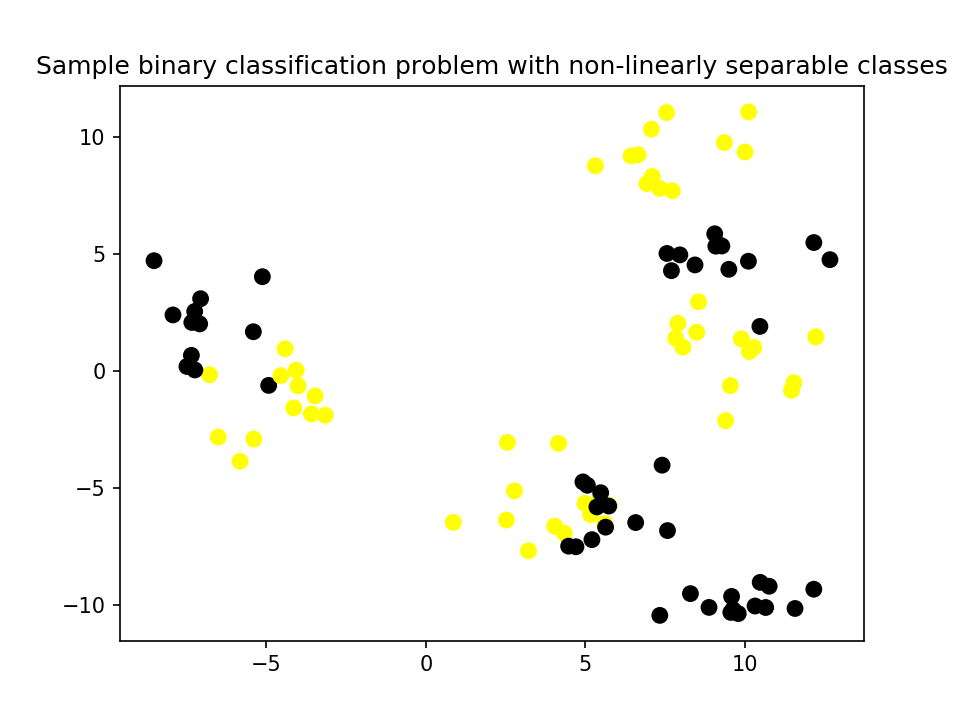

In [9]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [10]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

### Naive Bayes Classifier

<IPython.core.display.Javascript object>


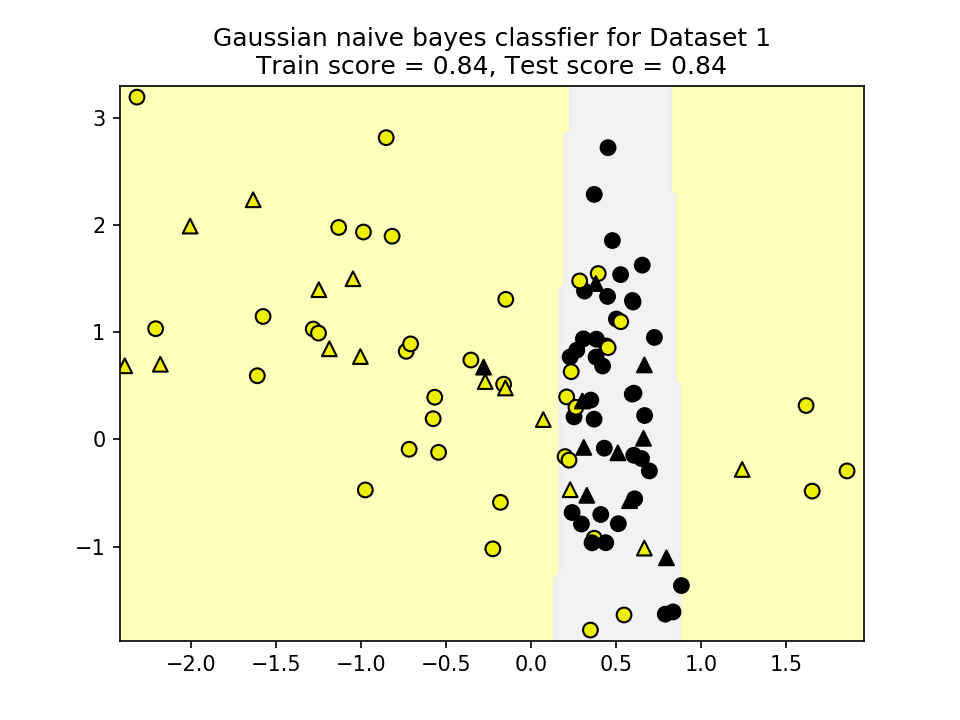

In [17]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

## User binaray classification data generated above, which has two features. 
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
# get gaussian classifier post fit X_train, y_train
nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gaussian naive bayes classfier for Dataset 1')

<IPython.core.display.Javascript object>


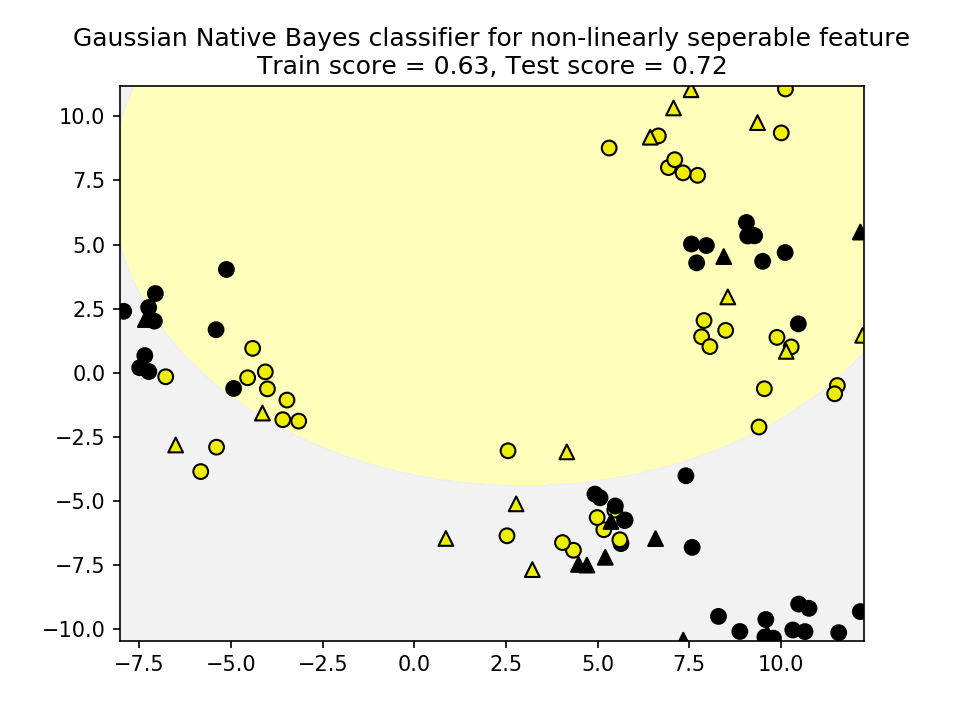

In [19]:
## Gaussian Classfier score on Train and test data for class where features are non-linearly seperable. 

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
nbclf = GaussianNB().fit(X_train, y_train)

plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gaussian Native Bayes classifier for non-linearly seperable feature')
## because features are non-linearly seperable (i.e. there is covariance between them). Therefore 
## Training and Test Score is very low. 

### Application to a real world dataset.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
nbclf = GaussianNB().fit(X_train, y_train)

print("Breast cancer dataset")
print("Accuracy on training set {:.2f}".format(nbclf.score(X_train, y_train)))
print("Accuracy on test set {:.2f}".format(nbclf.score(X_test, y_test)))



Breast cancer dataset
Accuracy on training set 0.95
Accuracy on test set 0.94


### Random Forest
#### Random Forest prediction on complex dataset that is non-linearly seperable.

<IPython.core.display.Javascript object>


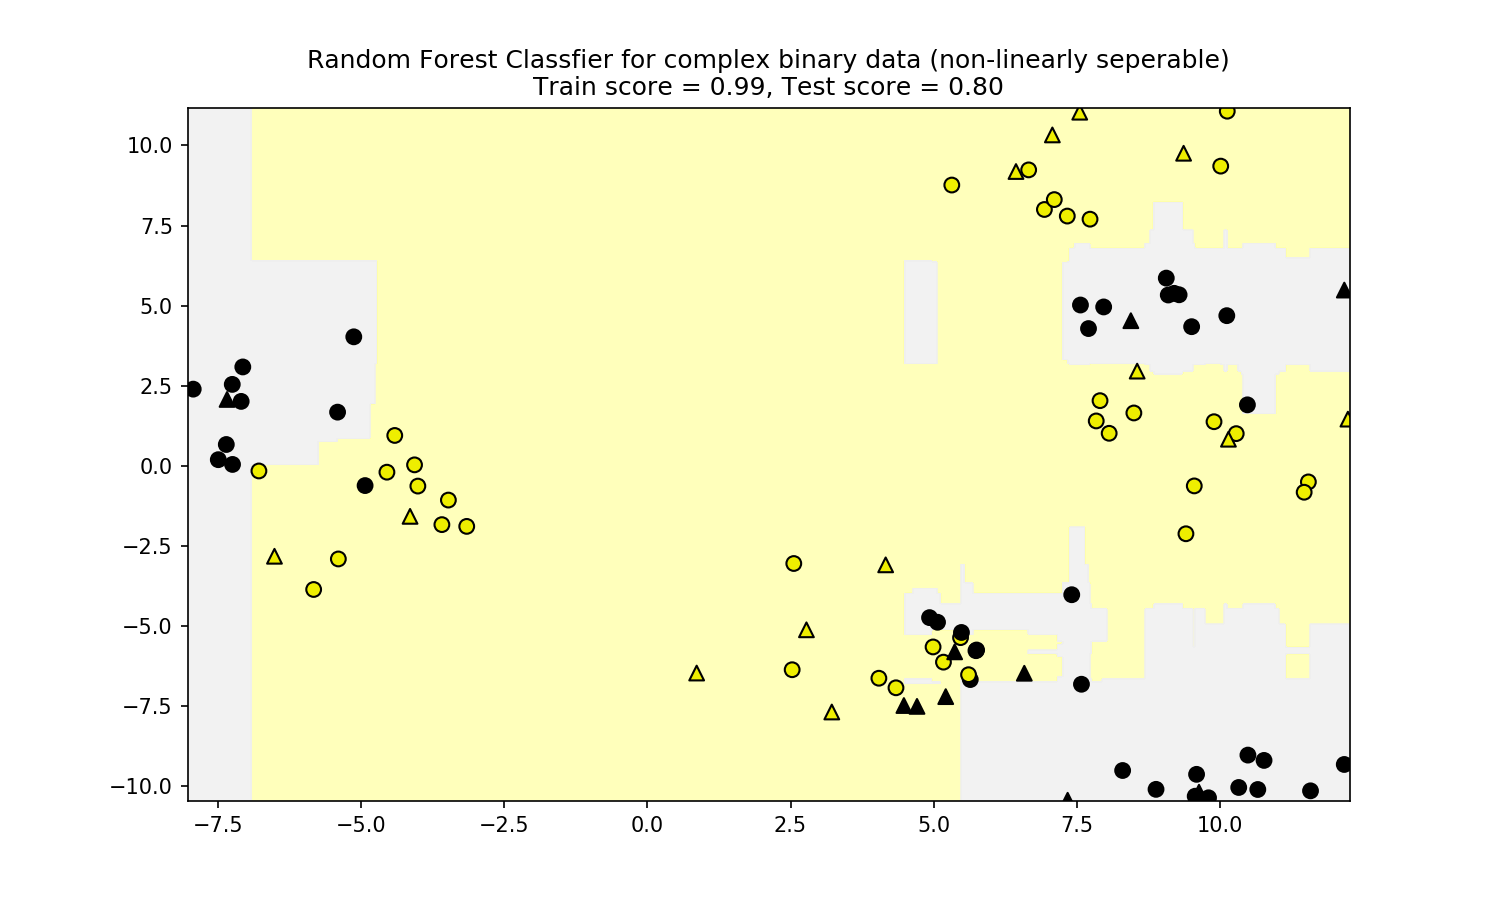

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
clf = RandomForestClassifier().fit(X_train, y_train)

title = 'Random Forest Classfier for complex binary data (non-linearly seperable)'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title,ax)

### RandomForestClassifier: Fruit Dataset

<IPython.core.display.Javascript object>


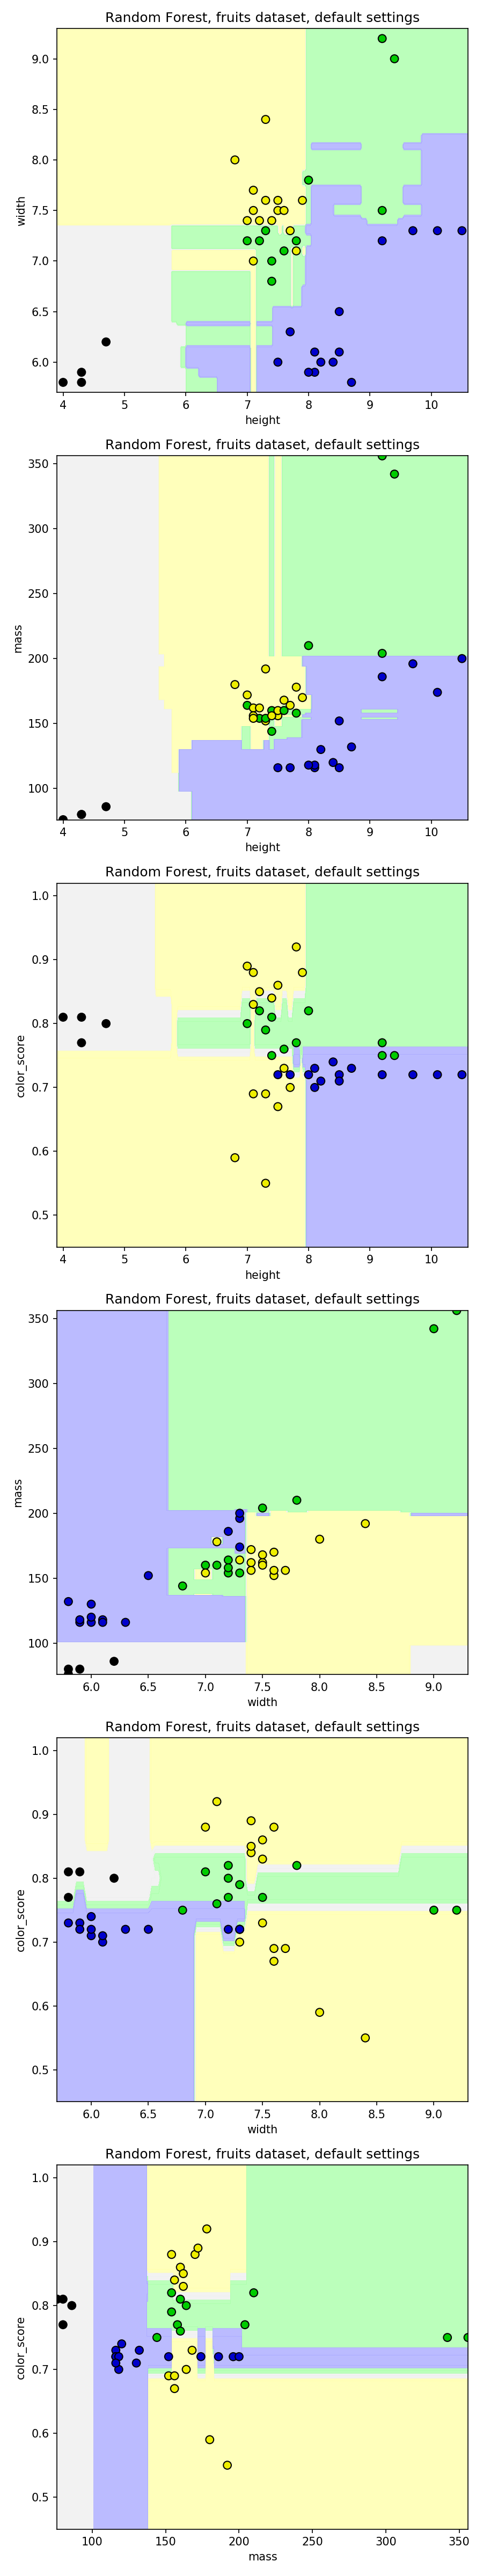

Random Forest, Fruit Dataset, default setting
Training Set Accuracy: 1.00
Test Set Accuracy: 0.80


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values, y_fruits.values, random_state=0)
fig, subax = plt.subplots(6, 1, figsize=(6, 32))

pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
title = 'Random Forest, fruits dataset, default settings'

for pair, ax  in zip(pairs, subax):
    X = X_train[:, pair]
    y = y_train
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None, None, title, ax)
    
    ax.set_xlabel(columns[pair[0]])
    ax.set_ylabel(columns[pair[1]])

plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10, random_state=0).fit(X_train, y_train)
print('Random Forest, Fruit Dataset, default setting')
print('Training Set Accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test Set Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
    

### RandomForestClassifier on real world dataset

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = RandomForestClassifier().fit(X_train, y_train)
print('RandomForestClassifier for Cancer dataset')
print('Training Set Accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test Set Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

RandomForestClassifier for Cancer dataset
Training Set Accuracy: 1.00
Test Set Accuracy: 0.94


### Gradient Boosted Decision Tree

<IPython.core.display.Javascript object>


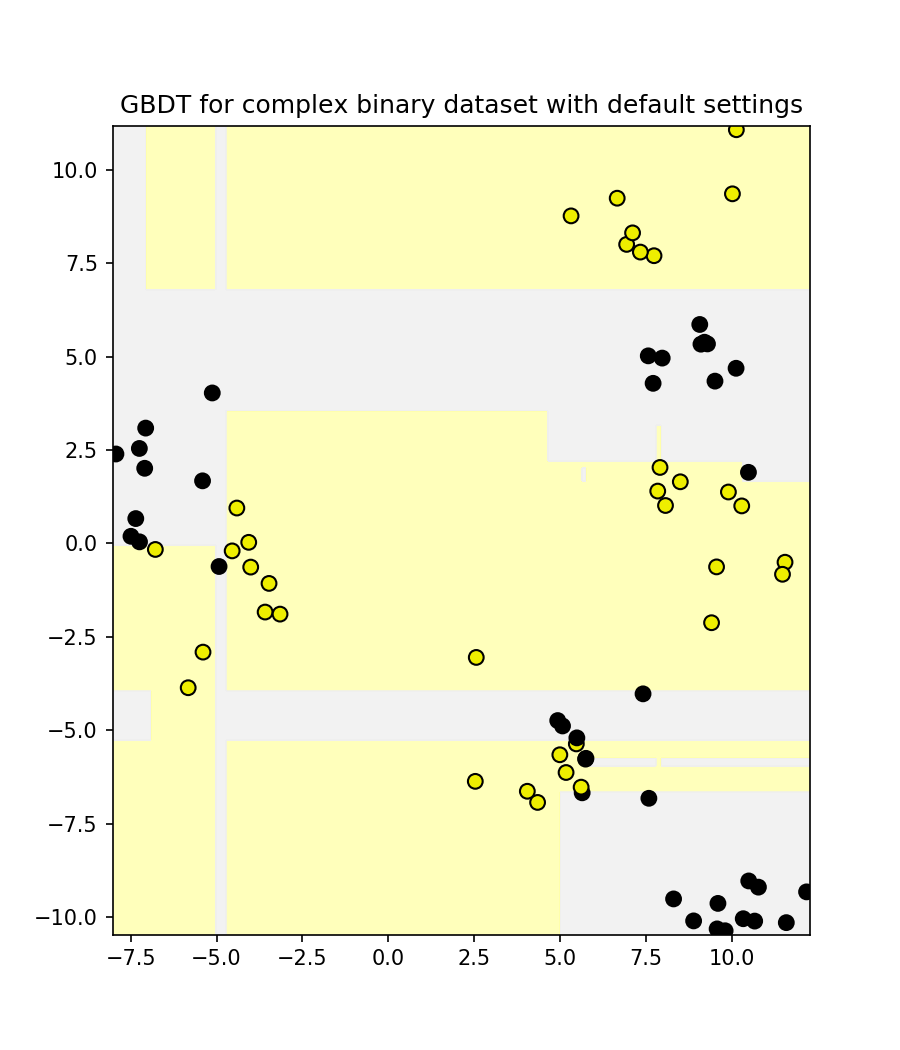

Training accuracy 1.00
Test accuracy 0.76


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

clf = GradientBoostingClassifier().fit(X_train, y_train)
fig, subax = plt.subplots(1, 1, figsize=(6, 7))

## Training accuracy comes out to 1.00 which looks likes its overfitting things.
print("Training accuracy {:.2f}".format(clf.score(X_train, y_train)))
print("Test accuracy {:.2f}".format(clf.score(X_test, y_test)))

title = "GBDT for complex binary dataset with default settings"
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subax)


<IPython.core.display.Javascript object>


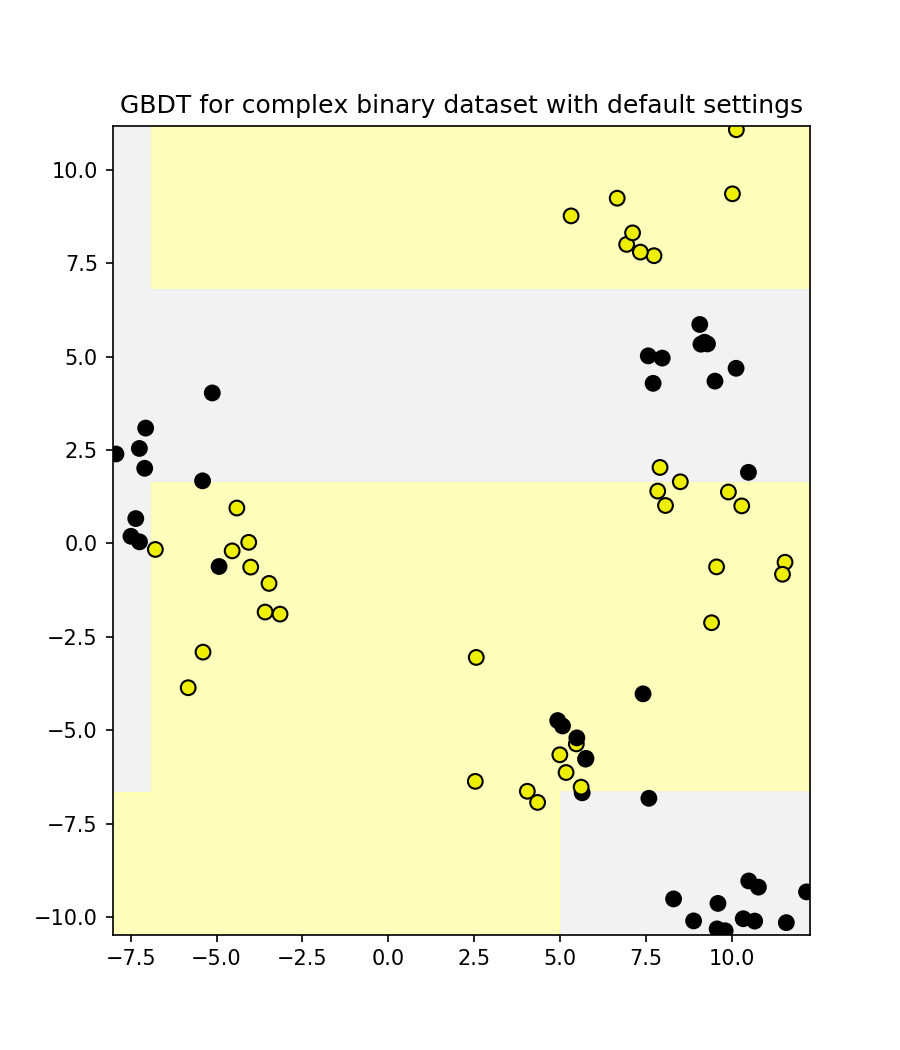

Training accuracy 0.91
Test accuracy 0.80


In [44]:
## Lets tweak some parameter for GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

## Changing learning rate only slightly increases the the test accuracy. Overfitting is gone as traning 
## accuracy is down to .9
clf = GradientBoostingClassifier(learning_rate=0.008, max_depth=2, n_estimators = 200).fit(X_train, y_train)
fig, subax = plt.subplots(1, 1, figsize=(6, 7))

## Training accuracy comes out to 1.00 which looks likes its overfitting things.
print("Training accuracy {:.2f}".format(clf.score(X_train, y_train)))
print("Test accuracy {:.2f}".format(clf.score(X_test, y_test)))

title = "GBDT for complex binary dataset with default settings"
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subax)

In [48]:
testset = pd.read_csv('test.csv', encoding="ISO-8859-1", low_memory=False)
testset.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status'],
      dtype='object')

In [49]:
trainingset = pd.read_csv('train.csv', encoding = "ISO-8859-1", low_memory=False)
trainingset.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [58]:
trainingset[trainingset['hearing_date'] != None].shape

(250306, 34)

In [59]:
trainingset[~trainingset['hearing_date'].isnull()].shape

(237815, 34)